# Distribution of floating point numbers in the real line: A Python demo

In [78]:
import itertools
from itertools import product

bits=[0,1]
k=2

products = product( bits, repeat=k)


In [79]:
dir(itertools)

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_grouper',
 '_tee',
 '_tee_dataobject',
 'accumulate',
 'chain',
 'combinations',
 'combinations_with_replacement',
 'compress',
 'count',
 'cycle',
 'dropwhile',
 'filterfalse',
 'groupby',
 'islice',
 'permutations',
 'product',
 'repeat',
 'starmap',
 'takewhile',
 'tee',
 'zip_longest']

In [80]:
products

In [81]:
listproducts = list(products)

Quiero generar mantisas. (Big Endian, humano ) 

$$ m = \sum_{i=1}^k b_i 2^{-i} $$

In [82]:
# Generemos mantisas
mant = []
n = len(listproducts)
n

4

In [83]:
for i in range(n):
    a = listproducts[i]
    print(a)
    b = sum( a[i] * 2**(-i-1) for i in range(k) )
    mant.append(b)
    

mant



(0, 0)
(0, 1)
(1, 0)
(1, 1)


[0.0, 0.25, 0.5, 0.75]

In [84]:
bits=[0,1]
def findMantisas(k):
    products = product( bits, repeat=k)
    listproducts = list(products)
    n = len(listproducts)

    mant = []

    for i in range(n):
        a = listproducts[i]
        # print(a)
        b = sum( a[i] * 2**(-i-1) for i in range(k) )
        mant.append(b)
    return mant

In [85]:
k=3
mantisas = findMantisas(k)
mantisas

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

In [86]:
def findExponents(k):
    products = product( bits, repeat=k)
    listproducts = list(products)
    n = len(listproducts)

    bias = 2**(k-1)

    exps = []

    for i in range(n):
        a = listproducts[i]
        print(a)
        b = sum( a[k-i-1] * 2**i for i in range(k) ) - bias
        exps.append(b)
    return exps

k=3
exponents = findExponents(k)
exponents

(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


[-4, -3, -2, -1, 0, 1, 2, 3]

In [87]:
def generateNumbers(exponents, mantisas):
    n = len(exponents)
    m = len(mantisas)
    numbers = []
    for i in range(n):
        for j in range(m):
            number = 2**exponents[i]*(1+mantisas[j])
            # print(number)
            numbers.append(number)
    return numbers

numbers = generateNumbers(exponents, mantisas)
numbers


[0.0625,
 0.0703125,
 0.078125,
 0.0859375,
 0.09375,
 0.1015625,
 0.109375,
 0.1171875,
 0.125,
 0.140625,
 0.15625,
 0.171875,
 0.1875,
 0.203125,
 0.21875,
 0.234375,
 0.25,
 0.28125,
 0.3125,
 0.34375,
 0.375,
 0.40625,
 0.4375,
 0.46875,
 0.5,
 0.5625,
 0.625,
 0.6875,
 0.75,
 0.8125,
 0.875,
 0.9375,
 1.0,
 1.125,
 1.25,
 1.375,
 1.5,
 1.625,
 1.75,
 1.875,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0]

In [90]:
n=len(numbers)
n

64

In [91]:
for i in range(1,n):
    print(numbers[i]-numbers[i-1])

0.0078125
0.0078125
0.0078125
0.0078125
0.0078125
0.0078125
0.0078125
0.0078125
0.015625
0.015625
0.015625
0.015625
0.015625
0.015625
0.015625
0.015625
0.03125
0.03125
0.03125
0.03125
0.03125
0.03125
0.03125
0.03125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [88]:
?sum

In [89]:
x=[1,2,3]
sum ( x)

6

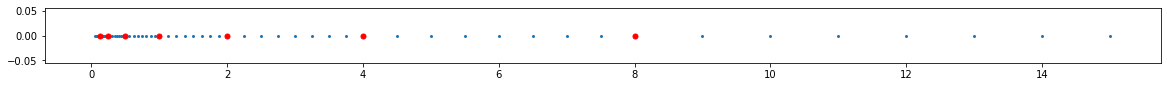

In [102]:
import numpy as np
import matplotlib.pyplot as plt
# numpy es: numerical python module
## Graficar

def doPlot(numbers, m):

    # creamos las ordenadas y
    ycoord = np.zeros(len(numbers))
    redballs = []

    nrballs = int(len(numbers)/2**m)

    j=0
    for i in range(1, nrballs):
        j += 2**m
        redballs.append(numbers[j])

    ycoord2 = np.zeros(len(redballs))

    plt.figure(figsize=[20,1])
    plt.plot(numbers, ycoord, 'o', markersize=2)
    # plt.plot(numbers, np.sin(numbers))
    plt.plot(redballs, ycoord2, 'o', markersize=5, color='r')

    plt.show()
    return

m=k
doPlot(numbers,m)


(0, 0)
(0, 1)
(1, 0)
(1, 1)


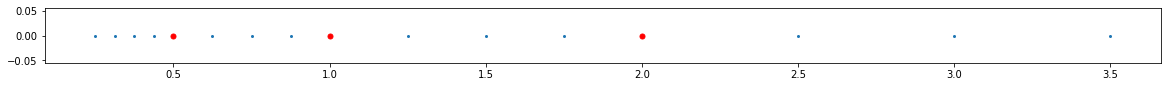

In [104]:
# do it all
# e = number of bits for exponent
# m = number of bits for mantissa

def createNumbers(e,m):
    mantisas = findMantisas(m)
    exponents = findExponents(e)
    numbers = generateNumbers(exponents, mantisas)
    doPlot(numbers, m)
    return

e=2
m=2

createNumbers(e,m)

# continuacion con representacion de numberos.
## memoria dinamica de enteros

In [110]:
import sys
from sys import getsizeof

a=2
print(type(a))
getsizeof(a) # 28 bytes

<class 'int'>


28

In [112]:
# dir(a)
a.__pow__(2)  # dunders

4

In [113]:
a=2**64
getsizeof(a)

36

In [114]:
a=2**(15000000)
getsizeof(a)

2000028

In [115]:
a

KeyboardInterrupt: ignored

In [116]:
# Floating point numbers:

import sys
minfloat = sys.float_info.min 
minfloat   # 2^(-1022)

2.2250738585072014e-308

In [117]:
2**(-1022)

2.2250738585072014e-308

In [118]:
# podemos ir mas abajo?
minfloat/10

2.225073858507203e-309

In [120]:
s=2**(-52)* 2**(-1022)
s

5e-324

In [121]:
s/2

0.0

El bit 53 no se almacena. Este se asigna asi:

* 1 si el numero es normal
* 0 si el numero es subnormal.
No existe $c=0$, $c=0$, $2^{-1023}$. En vez de esto se usa
$c=1$, $2^{-1022}$ y se introduce el bit 53 como un 0.

## Very large numbers.
El exponente mas grande es $c=(11111111111)_2= 2047$, 
$c-1023=1024$. Sin embargo Python no deja que se llegue alla, normalmente.
Para Python el numero mas grande es

$2^{1023}\times(1 + 1 - 2^{-52})$

In [123]:
l = 2**(1023)*(2- 2**(-52))
l

1.7976931348623157e+308

In [124]:
sys.float_info.max

1.7976931348623157e+308

In [128]:
ll = l+1
print(ll)

1.7976931348623157e+308


In [129]:
ll-l

0.0

In [130]:
ll == l

True

ll+100

In [132]:
ll == ll+100

True

Infininto en Python

In [137]:
l2 = l*2
print("twice the largest", l2)
pyinf = float('inf')
print("python infinity", pyinf)
print("infinity - 2=", pyinf-2)
print("infinity - infinity=", l2 - pyinf)
print("infinity/2=",pyinf/2)

twice the largest inf
python infinity inf
infinity - 2= inf
infinity - infinity= nan
infinity/2= inf


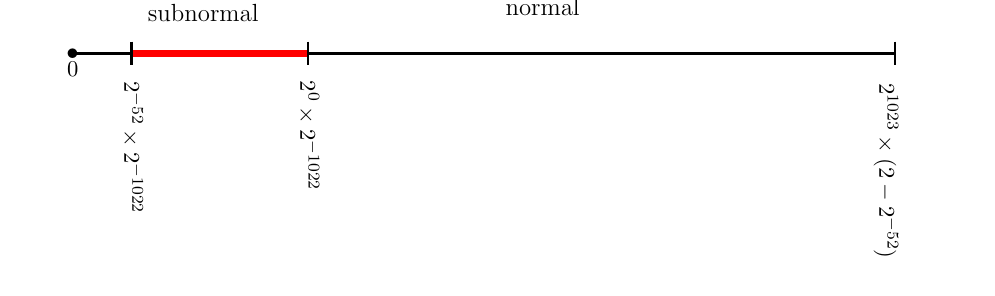